In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/Mall_Customers.csv")  # Replace with your dataset path




In [2]:
data.shape

(200, 5)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [9]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,0.019231,0.000000,0.387755
1,2,1,0.057692,0.000000,0.816327
2,3,0,0.038462,0.008197,0.051020
3,4,0,0.096154,0.008197,0.775510
4,5,0,0.250000,0.016393,0.397959


In [10]:
data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,0.400962,0.373443,0.502041
std,57.879185,0.497633,0.268635,0.215285,0.263505
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,50.750000,0.000000,0.206731,0.217213,0.344388
50%,100.500000,0.000000,0.346154,0.381148,0.500000
75%,150.250000,1.000000,0.596154,0.516393,0.734694
max,200.000000,1.000000,1.000000,1.000000,1.000000


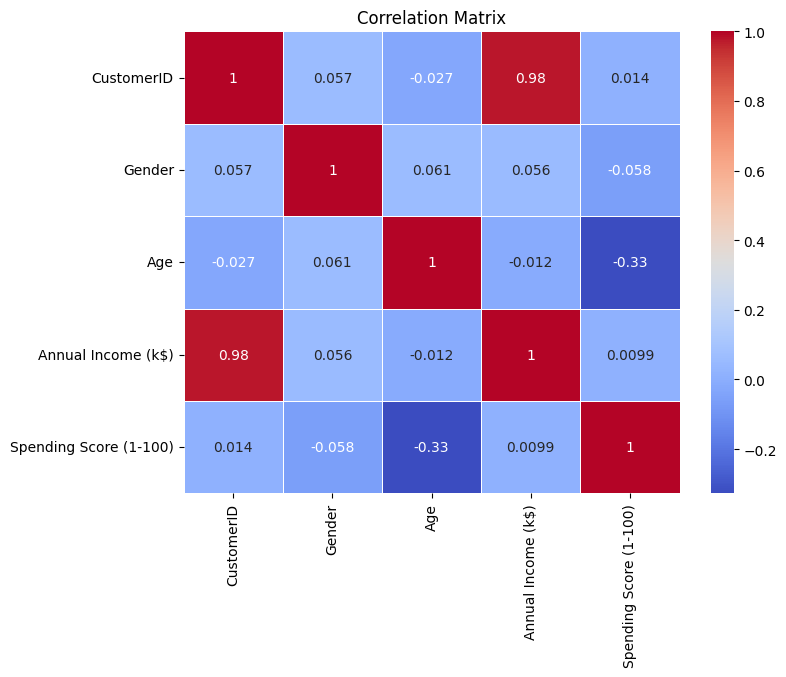

In [12]:
import seaborn as sns
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [15]:
X = data[['Age', 'Spending Score (1-100)']]
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

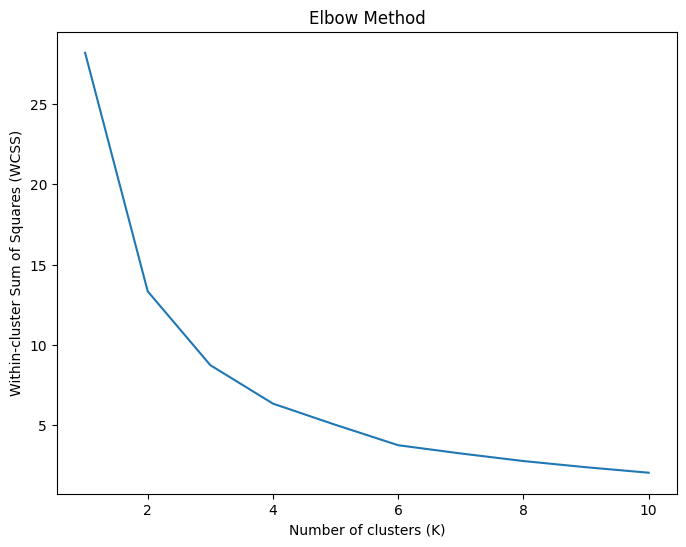

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.show()

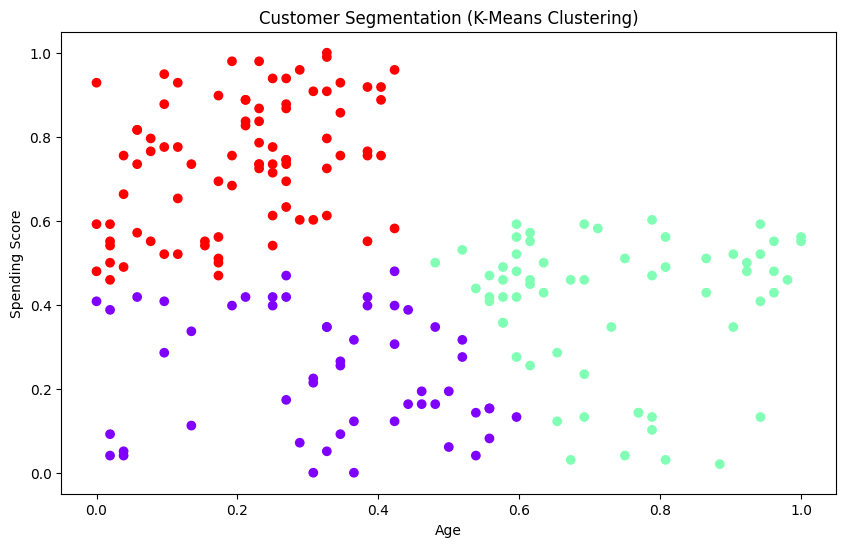

In [18]:
optimal_k = 3  # You can choose the appropriate K based on the Elbow plot

# Perform K-Means clustering with the chosen K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Visualize the clustered data
plt.figure(figsize=(10, 6))
plt.scatter(X['Age'], X['Spending Score (1-100)'], c=data['Cluster'], cmap='rainbow')
plt.title('Customer Segmentation (K-Means Clustering)')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()
